In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
#import dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\CO2 Emissions_Canada.csv',sep=',')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
#Summary Statistics
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
#Checking Null Values
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [8]:
# Selecting numerical columns
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                  'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Calculating summary statistics
summary_stats = df[numerical_cols].describe()

In [9]:
missing_values = df.isnull()
print("Missing Values:")
print(missing_values)

Missing Values:
       Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     False  False          False           False      False         False   
1     False  False          False           False      False         False   
2     False  False          False           False      False         False   
3     False  False          False           False      False         False   
4     False  False          False           False      False         False   
...     ...    ...            ...             ...        ...           ...   
7380  False  False          False           False      False         False   
7381  False  False          False           False      False         False   
7382  False  False          False           False      False         False   
7383  False  False          False           False      False         False   
7384  False  False          False           False      False         False   

      Fuel Type  Fuel Consumption City (L/100 k

In [10]:
print("Total rows of Missing Values:")
df[df.isnull().any(axis=1)].head()

Total rows of Missing Values:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [11]:
print("Records without missing value:")
df.dropna()

Records without missing value:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [12]:
df_rounded = df.describe().round(2)
print(df_rounded)

       Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
count         7385.00    7385.00                           7385.00   
mean             3.16       5.62                             12.56   
std              1.35       1.83                              3.50   
min              0.90       3.00                              4.20   
25%              2.00       4.00                             10.10   
50%              3.00       6.00                             12.10   
75%              3.70       6.00                             14.60   
max              8.40      16.00                             30.60   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                          7385.00                           7385.00   
mean                              9.04                             10.98   
std                               2.22                              2.89   
min                               4.00                           

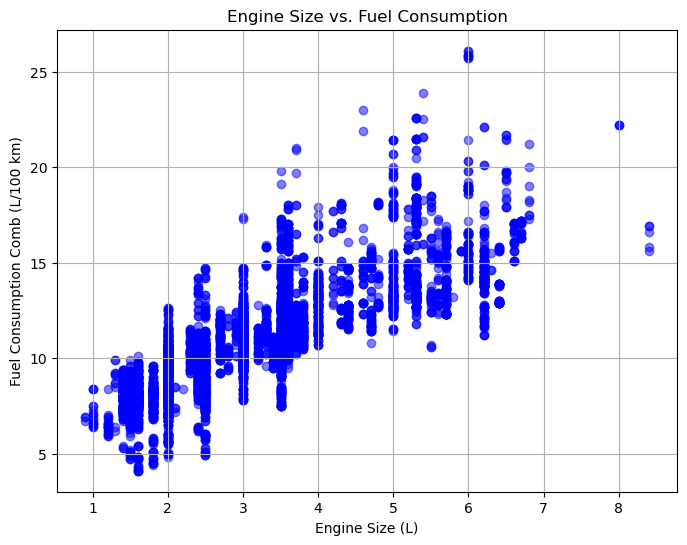

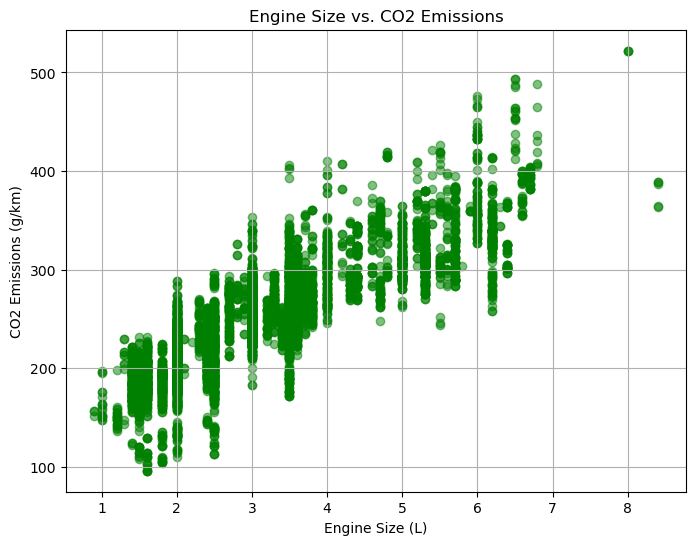

In [13]:
# Visualisation
# Create a scatter plot for Engine Size vs. Fuel Consumption
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine Size(L)'], df['Fuel Consumption Comb (L/100 km)'], color='blue', alpha=0.5)
plt.title('Engine Size vs. Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.grid(True)
plt.show()

# Create a scatter plot for Engine Size vs. CO2 Emissions
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], color='green', alpha=0.5)
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

In [14]:
# checking unique values 
df["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [15]:
x=df["Model"].unique()

y=[]

for model in x:
    y.append(model)
print(y)

['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD', 'TSX', '4C', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH', 'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO', 'A6 QUATTRO', 'A6 QUATTRO TDI (modified)', 'A7 QUATTRO', 'A7 QUATTRO TDI (modified)', 'A8', 'A8 TDI (modified)', 'A8L', 'A8L TDI (modified)', 'ALLROAD QUATTRO', 'Q5', 'Q5 TDI (modified)', 'Q5 HYBRID', 'Q7', 'Q7 TDI (modified)', 'R8', 'R8 SPYDER', 'RS 5', 'RS 5 CABRIOLET', 'RS 7', 'S4', 'S5', 'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO', 'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO', 'CONTINENTAL GT', 'CONTINENTAL GTC', 'CONTINENTAL GT SPEED CONVERTIBLE', 'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE', '328d xDRIVE TOURING', '328i', '328i xDRIVE', '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i', '335i xDRIVE', '335i xDRIVE GRAN TURISMO', '428i COUPE', '428i xDRIVE COUPE', '435i COUPE', '435i xDRIVE COUPE', '528i', '528i xDRIVE', '5

In [16]:
df["Vehicle Class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [17]:
df["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [18]:
df["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [19]:
# converting unique string value to int 
df["Make"] = df["Make"].astype('category')
df["Make"] = df["Make"].cat.reorder_categories(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'], ordered=True)
df["Make"] = df["Make"].cat.codes
print(df["Make"])

0        0
1        0
2        0
3        0
4        0
        ..
7380    39
7381    39
7382    39
7383    39
7384    39
Name: Make, Length: 7385, dtype: int8


In [20]:
# converting unique string value to int 
df["Model"] = df["Model"].astype('category')
df["Model"] = df["Model"].cat.reorder_categories(['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD', 'TSX', '4C', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH', 'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO', 'A6 QUATTRO', 'A6 QUATTRO TDI (modified)', 'A7 QUATTRO', 'A7 QUATTRO TDI (modified)', 'A8', 'A8 TDI (modified)', 'A8L', 'A8L TDI (modified)', 'ALLROAD QUATTRO', 'Q5', 'Q5 TDI (modified)', 'Q5 HYBRID', 'Q7', 'Q7 TDI (modified)', 'R8', 'R8 SPYDER', 'RS 5', 'RS 5 CABRIOLET', 'RS 7', 'S4', 'S5', 'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO', 'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO', 'CONTINENTAL GT', 'CONTINENTAL GTC', 'CONTINENTAL GT SPEED CONVERTIBLE', 'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE', '328d xDRIVE TOURING', '328i', '328i xDRIVE', '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i', '335i xDRIVE', '335i xDRIVE GRAN TURISMO', '428i COUPE', '428i xDRIVE COUPE', '435i COUPE', '435i xDRIVE COUPE', '528i', '528i xDRIVE', '535d xDRIVE', '535i xDRIVE', '535i xDRIVE GRAN TURISMO', '550i xDRIVE', '550i xDRIVE GRAN TURISMO', '640i xDRIVE GRAN COUPE', '650i xDRIVE CABRIOLET', '650i xDRIVE COUPE', '650i xDRIVE GRAN COUPE', '740Li xDRIVE', '750i xDRIVE', '750Li xDRIVE', '760Li', 'ACTIVEHYBRID 3', 'ACTIVEHYBRID 5', 'ACTIVEHYBRID 7L', 'ALPINA B7 xDRIVE LWB', 'ALPINA B7 xDRIVE SWB', 'M5', 'M6', 'M6 CABRIOLET', 'M6 GRAN COUPE', 'X1 xDRIVE28i', 'X1 xDRIVE35i', 'X3 xDRIVE28i', 'X3 xDRIVE35i', 'X5 xDRIVE35i', 'X5 xDRIVE50i', 'X6 M', 'X6 xDRIVE35i', 'X6 xDRIVE50i', 'Z4 sDRIVE28i', 'Z4 sDRIVE35i', 'Z4 sDRIVE35is', 'ENCLAVE', 'ENCLAVE AWD', 'ENCORE', 'ENCORE AWD', 'LACROSSE', 'LACROSSE AWD', 'LACROSSE eASSIST', 'REGAL', 'REGAL AWD', 'REGAL eASSIST', 'VERANO', 'ATS', 'ATS AWD', 'CTS COUPE', 'CTS COUPE AWD', 'CTS SEDAN', 'CTS SEDAN AWD', 'CTS SEDAN Vsport', 'CTS SPORT WAGON', 'CTS SPORT WAGON AWD', 'CTS-V COUPE', 'CTS-V SEDAN', 'CTS-V SPORT WAGON', 'ESCALADE AWD', 'ESCALADE ESV AWD', 'SRX', 'SRX AWD', 'XTS', 'XTS AWD', 'XTS Vsport AWD', 'CAMARO', 'CAMARO 2LS', 'CAMARO SS', 'CAMARO ZL1', 'CORVETTE', 'CRUZE', 'CRUZE DIESEL', 'CRUZE ECO', 'EQUINOX', 'EQUINOX AWD', 'EXPRESS 1500 CARGO', 'EXPRESS 1500 CARGO AWD', 'EXPRESS 1500 CARGO CONV', 'EXPRESS 1500 CARGO CONV AWD', 'EXPRESS 1500 PASSENGER', 'EXPRESS 1500 PASSENGER AWD', 'EXPRESS 2500 PASSENGER', 'EXPRESS 3500 PASSENGER', 'IMPALA', 'IMPALA ECO', 'MALIBU', 'ORLANDO', 'SILVERADO', 'SILVERADO 4WD', 'SONIC', 'SONIC RS', 'SONIC 5', 'SONIC 5 RS', 'SPARK', 'SUBURBAN', 'SUBURBAN 4WD', 'TAHOE', 'TAHOE 4WD', 'TRAVERSE', 'TRAVERSE AWD', 'TRAX', 'TRAX AWD', '300', '200 CONVERTIBLE', '200 CONVERTIBLE FFV', '200 SEDAN', '200 SEDAN FFV', '300 (MDS)', '300 AWD', '300 AWD (MDS)', '300 AWD FFV', '300 FFV', '300 SRT (MDS)', 'TOWN & COUNTRY FFV', 'AVENGER', 'AVENGER FFV', 'CHALLENGER', 'CHALLENGER (MDS)', 'CHALLENGER SRT', 'CHALLENGER SRT (MDS)', 'CHARGER', 'CHARGER (MDS)', 'CHARGER AWD', 'CHARGER AWD (MDS)', 'CHARGER AWD FFV', 'CHARGER FFV', 'CHARGER SRT (MDS)', 'DART', 'DART FFV', 'DART GT', 'DART TURBO AERO', 'DURANGO AWD (MDS)', 'DURANGO AWD FFV', 'GRAND CARAVAN FFV', 'JOURNEY', 'JOURNEY AWD', 'JOURNEY FFV', '500 ABARTH CABRIO', '500 ABARTH HATCHBACK', '500 CABRIO', '500 CABRIO TURBO', '500 HATCHBACK', '500 HATCHBACK TURBO', '500L TURBO', 'C-MAX HYBRID', 'E150 VAN FFV', 'E150 WAGON FFV', 'E350 WAGON', 'E350 WAGON FFV', 'EDGE', 'EDGE AWD', 'ESCAPE', 'ESCAPE AWD', 'EXPEDITION 4X4 FFV', 'EXPLORER', 'EXPLORER AWD', 'EXPLORER FFV', 'EXPLORER FFV AWD', 'F-150', 'F-150 4X4', 'F-150 FFV', 'F-150 FFV 4X4', 'F-150 RAPTOR 4X4', 'FIESTA', 'FIESTA SFE', 'FIESTA ST', 'FLEX', 'FLEX AWD', 'FLEX AWD (EcoBoost)', 'FOCUS', 'FOCUS FFV', 'FOCUS SFE FFV', 'FUSION', 'FUSION (Start/Stop)', 'FUSION AWD', 'FUSION HYBRID', 'MUSTANG', 'MUSTANG CONVERTIBLE', 'TAURUS', 'TAURUS AWD', 'TAURUS FFV', 'TAURUS FFV AWD', 'TRANSIT CONNECT', 'TRANSIT CONNECT TAXI', 'TRANSIT CONNECT WAGON', 'ACADIA', 'ACADIA AWD', 'SAVANA 1500 CARGO', 'SAVANA 1500 CARGO AWD', 'SAVANA 1500 CARGO CONV', 'SAVANA 1500 CARGO CONV AWD', 'SAVANA 1500 PASSENGER', 'SAVANA 1500 PASSENGER AWD', 'SAVANA 2500 PASSENGER', 'SAVANA 3500 PASSENGER', 'SIERRA', 'SIERRA 4WD', 'TERRAIN', 'TERRAIN AWD', 'YUKON', 'YUKON 4WD', 'YUKON DENALI AWD', 'YUKON DENALI XL AWD', 'YUKON XL', 'YUKON XL 4WD', 'ACCORD', 'ACCORD HYBRID', 'CIVIC', 'CROSSTOUR AWD', 'CR-V', 'CR-V AWD', 'CR-Z', 'FIT', 'ODYSSEY', 'PILOT', 'PILOT AWD', 'RIDGELINE AWD', 'ACCENT', 'ELANTRA GT', 'EQUUS', 'GENESIS', 'SANTA FE', 'SANTA FE 4WD', 'SANTA FE SPORT', 'SANTA FE SPORT 4WD', 'SONATA', 'SONATA HYBRID', 'SONATA HYBRID LIMITED', 'TUCSON', 'TUCSON 4WD', 'VELOSTER', 'VELOSTER TURBO', 'Q50', 'Q50 AWD', 'Q50 HYBRID', 'Q50 HYBRID AWD', 'Q60 AWD COUPE', 'Q60 CONVERTIBLE', 'Q60 COUPE', 'Q70', 'Q70 AWD', 'Q70 HYBRID', 'QX50 AWD', 'QX60', 'QX60 AWD', 'QX60 HYBRID AWD', 'QX70 AWD', 'QX80 4WD', 'F-TYPE CONVERTIBLE', 'F-TYPE S CONVERTIBLE', 'F-TYPE V8 S CONVERTIBLE', 'XF', 'XF 3.0L AWD', 'XFR', 'XFR-S', 'XJ AWD', 'XJ SUPERCHARGED', 'XJL AWD PORTFOLIO', 'XJL SUPERCHARGED', 'XJR', 'XJR LWB', 'XK CONVERTIBLE', 'XK COUPE', 'XKR CONVERTIBLE', 'XKR COUPE', 'XKR-S CONVERTIBLE', 'XKR-S COUPE', 'CHEROKEE', 'CHEROKEE 4X4', 'CHEROKEE 4X4 ACTIVE DRIVE II', 'CHEROKEE TRAILHAWK 4X4', 'COMPASS', 'COMPASS 4X4', 'COMPASS 4X4 TRAIL RATED', 'GRAND CHEROKEE 4X4 (MDS)', 'GRAND CHEROKEE 4X4 DIESEL', 'GRAND CHEROKEE 4X4 FFV', 'GRAND CHEROKEE SRT 4X4 (MDS)', 'PATRIOT', 'PATRIOT 4X4', 'PATRIOT 4X4 TRAIL RATED', 'WRANGLER 4X4 (2-DOOR)', 'WRANGLER UNLIMITED 4X4 (4-DOOR)', 'CADENZA', 'FORTE', 'FORTE 5', 'FORTE KOUP', 'OPTIMA', 'OPTIMA HYBRID', 'OPTIMA HYBRID EX', 'RIO', 'RIO ECO', 'RONDO', 'SEDONA', 'SORENTO', 'SORENTO 4WD', 'SOUL', 'SOUL ECO Dynamics', 'SPORTAGE', 'SPORTAGE AWD', 'AVENTADOR COUPE', 'GALLARDO COUPE', 'LR2', 'LR4', 'RANGE ROVER EVOQUE', 'RANGE ROVER EVOQUE COUPE', 'RANGE ROVER LWB V8 5.0 SC', 'RANGE ROVER LWB V8 5.0 SC FFV', 'RANGE ROVER SPORT V6 3.0 SC', 'RANGE ROVER SPORT V6 3.0 SC FFV', 'RANGE ROVER SPORT V8 5.0 SC', 'RANGE ROVER SPORT V8 5.0 SC FFV', 'RANGE ROVER V6 3.0 SC', 'RANGE ROVER V6 3.0 SC FFV', 'RANGE ROVER V8 5.0 SC', 'RANGE ROVER V8 5.0 SC FFV', 'CT 200h', 'ES 300h', 'ES 350', 'GS 350', 'GS 350 AWD', 'GS 450h', 'GX 460', 'IS 250', 'IS 250 AWD', 'IS 250 C', 'IS 350', 'IS 350 AWD', 'IS 350 C', 'IS F', 'LS 460', 'LS 460 AWD', 'LS 460 L AWD', 'LS 600h L', 'LX 570', 'RX 350 AWD', 'RX 450h AWD', 'MKS AWD', 'MKT AWD', 'MKT LIVERY', 'MKT LIVERY AWD', 'MKX AWD', 'MKZ', 'MKZ AWD', 'MKZ HYBRID', 'NAVIGATOR 4X4 FFV', 'GHIBLI', 'GHIBLI AWD', 'GRANTURISMO', 'GRANTURISMO CONVERTIBLE', 'QUATTROPORTE GTS', 'QUATTROPORTE SQ4', 'CX-5', 'CX-5 4WD', 'CX-9', 'CX-9 4WD', 'MAZDA2', 'MAZDA3 4-DOOR', 'MAZDA3 4-DOOR (i-ELOOP)', 'MAZDA3 4-DOOR (SIL)', 'MAZDA3 5-DOOR', 'MAZDA3 5-DOOR (i-ELOOP)', 'MAZDA3 5-DOOR (SIL)', 'MAZDA5', 'MAZDA6', 'MAZDA6 (i-ELOOP)', 'MX-5', 'B 250', 'C 250', 'C 250 COUPE', 'C 300 4MATIC FFV', 'C 350', 'C 350 4MATIC', 'C 350 4MATIC COUPE', 'C 350 COUPE', 'C 63 AMG', 'C 63 AMG COUPE', 'CL 550 4MATIC', 'CL 63 AMG', 'CLA 250', 'CLA 45 AMG 4MATIC', 'CLS 550 4MATIC', 'CLS 63 AMG 4MATIC', 'CLS 63 AMG S 4MATIC', 'E 250 BLUETEC 4MATIC', 'E 300 4MATIC', 'E 350 4MATIC', 'E 350 4MATIC COUPE', 'E 350 4MATIC WAGON', 'E 350 CABRIOLET', 'E 350 COUPE', 'E 400 HYBRID', 'E 550 4MATIC', 'E 550 CABRIOLET', 'E 550 COUPE', 'E 63 AMG 4MATIC', 'E 63 AMG 4MATIC WAGON', 'E 63 AMG S 4MATIC', 'E 63 AMG S 4MATIC WAGON', 'G 550', 'G 63 AMG', 'GL 350 BLUETEC 4MATIC', 'GL 450 4MATIC', 'GL 550 4MATIC', 'GL 63 AMG', 'GLK 250 BLUETEC 4MATIC', 'GLK 350 4MATIC', 'ML 350 4MATIC FFV', 'ML 350 BLUETEC 4MATIC', 'ML 550 4MATIC', 'ML 63 AMG 4MATIC', 'S 550 4MATIC LWB', 'S 550 4MATIC SWB', 'S 63 AMG 4MATIC', 'SL 550', 'SL 63 AMG', 'SL 65 AMG', 'SLK 250', 'SLK 350', 'SLK 55 AMG', 'SLS AMG BLACK SERIES COUPE', 'SLS AMG GT COUPE', 'SLS AMG ROADSTER', 'COOPER CLUBMAN', 'COOPER CONVERTIBLE', 'COOPER COUNTRYMAN', 'COOPER COUPE', 'COOPER PACEMAN', 'COOPER ROADSTER', 'COOPER S CLUBMAN', 'COOPER S CONVERTIBLE', 'COOPER S COUNTRYMAN ALL4', 'COOPER S COUPE', 'COOPER S PACEMAN ALL4', 'COOPER S ROADSTER', 'JOHN COOPER WORKS CLUBMAN', 'JOHN COOPER WORKS CONVERTIBLE', 'JOHN COOPER WORKS COUNTRYMAN ALL4', 'JOHN COOPER WORKS COUPE', 'JOHN COOPER WORKS PACEMAN ALL4', 'JOHN COOPER WORKS ROADSTER', 'LANCER', 'LANCER AWD', 'LANCER EVOLUTION', 'LANCER RALLIART', 'LANCER SPORTBACK', 'MIRAGE', 'OUTLANDER', 'OUTLANDER 4WD', 'RVR', 'RVR 4WD', '370Z', '370Z ROADSTER', 'ALTIMA', 'ARMADA 4WD', 'FRONTIER', 'FRONTIER 4WD', 'GT-R', 'JUKE', 'JUKE AWD', 'MAXIMA', 'MURANO AWD', 'NV200 CARGO VAN', 'PATHFINDER', 'PATHFINDER 4WD', 'PATHFINDER HYBRID 4WD', 'QUEST', 'ROGUE', 'ROGUE AWD', 'SENTRA', 'TITAN', 'TITAN 4WD', 'VERSA', 'XTERRA 4WD', '911 CARRERA', '911 CARRERA 4', '911 CARRERA 4 CABRIOLET', '911 CARRERA 4S', '911 CARRERA 4S CABRIOLET', '911 CARRERA CABRIOLET', '911 CARRERA S', '911 CARRERA S CABRIOLET', '911 GT3', '911 TURBO', '911 TURBO CABRIOLET', '911 TURBO S', '911 TURBO S CABRIOLET', 'BOXSTER', 'BOXSTER S', 'CAYENNE', 'CAYENNE DIESEL (modified)', 'CAYENNE GTS', 'CAYENNE S', 'CAYENNE S HYBRID', 'CAYENNE TURBO', 'CAYENNE TURBO S', 'CAYMAN', 'CAYMAN S', 'PANAMERA', 'PANAMERA 4', 'PANAMERA 4S', 'PANAMERA 4S EXECUTIVE', 'PANAMERA GTS', 'PANAMERA S', 'PANAMERA TURBO', 'PANAMERA TURBO EXECUTIVE', '1500 (MDS)', '1500 4X4 (MDS)', '1500 4X4 DIESEL', '1500 4X4 FFV', '1500 DIESEL', '1500 FFV', '1500 HFE', 'CARGO VAN FFV', 'GHOST', 'GHOST EWB', 'PHANTOM', 'PHANTOM COUPE', 'PHANTOM DROPHEAD COUPE', 'PHANTOM EWB', 'WRAITH', 'FR-S', 'iQ', 'tC', 'xB', 'xD', 'FORTWO CABRIOLET', 'FORTWO COUPE', 'VIPER COUPE', 'VIPER GTS COUPE', 'BRZ', 'FORESTER AWD', 'IMPREZA AWD', 'IMPREZA WAGON AWD', 'LEGACY AWD', 'OUTBACK AWD', 'TRIBECA AWD', 'XV CROSSTREK AWD', 'XV CROSSTREK HYBRID AWD', '4RUNNER (Part-Time 4WD)', '4RUNNER 4WD', 'AVALON', 'CAMRY', 'CAMRY HYBRID LE', 'CAMRY HYBRID XLE/SE', 'COROLLA', 'COROLLA LE ECO (1-mode)', 'COROLLA LE ECO (2-mode)', 'COROLLA MATRIX', 'FJ CRUISER 4WD', 'HIGHLANDER', 'HIGHLANDER AWD', 'HIGHLANDER HYBRID AWD', 'HIGHLANDER HYBRID AWD LE', 'PRIUS', 'PRIUS c', 'PRIUS v', 'RAV4', 'RAV4 AWD', 'RAV4 LIMITED AWD', 'SEQUOIA 4WD', 'SIENNA', 'SIENNA AWD', 'TACOMA', 'TACOMA 4WD', 'TUNDRA', 'TUNDRA 4WD', 'VENZA', 'VENZA 4WD', 'YARIS', 'BEETLE', 'BEETLE TDI (modified)', 'BEETLE CONVERTIBLE', 'CC', 'CC 4MOTION', 'EOS', 'GOLF WAGON', 'GOLF WAGON TDI (modified)', 'JETTA', 'JETTA TDI (modified)', 'JETTA GLI', 'JETTA TURBO HYBRID', 'PASSAT', 'PASSAT TDI (modified)', 'ROUTAN', 'TIGUAN', 'TIGUAN 4MOTION', 'TOUAREG', 'TOUAREG TDI (modified)', 'S60', 'S60 AWD', 'S80', 'S80 AWD', 'XC60', 'XC60 AWD', 'XC70 AWD', 'XC90 AWD', 'MDX SH-AWD', 'RLX HYBRID', 'TLX', 'TLX SH-AWD', 'RAPIDE S', 'V12 VANTAGE S', 'VANTAGE GT', 'A3', 'A3 TDI (modified)', 'A3 QUATTRO', 'A3 CABRIOLET QUATTRO', 'A4 ALLROAD QUATTRO', 'Q3', 'Q3 QUATTRO', 'S3', 'CONTINENTAL GT CONVERTIBLE', 'CONTINENTAL GT3-R', '228i CABRIOLET', '228i COUPE', '228i xDRIVE CABRIOLET', '228i xDRIVE COUPE', '320i SEDAN', '320i xDRIVE SEDAN', '328d xDRIVE SEDAN', '328i SEDAN', '328i xDRIVE SEDAN', '335i SEDAN', '335i xDRIVE SEDAN', '428i CABRIOLET', '428i GRAN COUPE', '428i xDRIVE CABRIOLET', '428i xDRIVE GRAN COUPE', '435i CABRIOLET', '435i GRAN COUPE', '435i xDRIVE CABRIOLET', '435i xDRIVE GRAN COUPE', '528i SEDAN', '528i xDRIVE SEDAN', '535d xDRIVE SEDAN', '535i xDRIVE SEDAN', '550i xDRIVE SEDAN', '640i xDRIVE CABRIOLET', '740Ld xDRIVE SEDAN', '740Li xDRIVE SEDAN', '750i xDRIVE SEDAN', '750Li xDRIVE SEDAN', '760Li SEDAN', 'ALPINA B6 xDRIVE GRAN COUPE', 'M235i CABRIOLET', 'M235i COUPE', 'M235i xDRIVE COUPE', 'M3 SEDAN', 'M4 CABRIOLET', 'M4 COUPE', 'M5 SEDAN', 'M6 COUPE', 'X3 xDRIVE28d', 'X4 xDRIVE28i', 'X4 xDRIVE35i', 'X5 M', 'X5 xDRIVE35d', 'CTS', 'CTS AWD', 'CTS Vsport', 'ESCALADE 4WD', 'ESCALADE ESV 4WD', 'CAMARO Z/28', 'CITY EXPRESS', 'COLORADO', 'COLORADO 4WD', 'CORVETTE Z06', 'EQUINOX FFV', 'EQUINOX AWD FFV', 'EXPRESS 2500 PASSENGER FFV', 'EXPRESS 3500 PASSENGER FFV', '200', '200 FFV', '200 AWD', '200 AWD FFV', 'CHALLENGER SRT HELLCAT', 'CHARGER SRT 392 HEMI', 'CHARGER SRT HELLCAT', 'VIPER SRT COUPE', '500L', 'EDGE (Start/Stop)', 'EDGE SPORT AWD', 'EXPEDITION 4X4', 'EXPEDITION MAX 4X4', 'EXPLORER AWD (EcoBoost)', 'T-150 WAGON', 'T-150 WAGON FFV', 'TRANSIT CONNECT VAN', 'TRANSIT CONNECT WAGON TAXI', 'CANYON', 'CANYON 4WD', 'SAVANA 2500 PASSENGER FFV', 'SAVANA 3500 PASSENGER FFV', 'TERRAIN FFV', 'YUKON DENALI 4WD', 'YUKON XL DENALI 4WD', 'CIVIC Si', 'CIVIC HYBRID', 'PILOT 4WD', 'ELANTRA', 'ELANTRA COUPE', 'GENESIS AWD', 'GENESIS COUPE', 'SANTA FE AWD', 'SANTA FE SPORT AWD', 'SANTA FE ULTIMATE AWD', 'SONATA SPORT/LIMITED', 'TUCSON AWD', 'Q60', 'Q60 AWD', 'F-TYPE COUPE', 'F-TYPE S COUPE', 'F-TYPE V8 R COUPE', 'XF AWD', 'CHEROKEE FFV', 'CHEROKEE 4X4 FFV', 'RENEGADE', 'RENEGADE FFV', 'RENEGADE 4X4', 'WRANGLER 4X4', 'WRANGLER UNLIMITED 4X4', 'K900', 'SEDONA SX', 'SEDONA SXL', 'SORENTO AWD', 'AVENTADOR ROADSTER', 'HURACAN', 'VENENO ROADSTER', 'RANGE ROVER', 'RANGE ROVER SUPERCHARGED', 'RANGE ROVER SUPERCHARGED LWB', 'RANGE ROVER SPORT', 'RANGE ROVER SPORT SUPERCHARGED', 'NX 200t AWD', 'NX 200t AWD F SPORT', 'NX 300h AWD', 'RC 350', 'RC 350 AWD', 'RC F', 'MKC AWD', 'NAVIGATOR 4X4', 'NAVIGATOR L 4X4', 'B 250 4MATIC', 'C 300 4MATIC', 'C 400 4MATIC', 'CLA 250 4MATIC', 'CLA 45 AMG', 'CLS 400 4MATIC', 'E 400 4MATIC', 'E 400 4MATIC WAGON', 'E 400 CABRIOLET', 'E 400 COUPE', 'GLA 250 4MATIC', 'GLA 45 AMG 4MATIC', 'ML 400 4MATIC', 'S 400 4MATIC', 'S 550 4MATIC COUPE', 'S 600', 'S 63 AMG COUPE', 'S 65 AMG', 'S 65 AMG COUPE', 'SLS AMG GT ROADSTER', 'COOPER 3 DOOR', 'COOPER 5 DOOR', 'COOPER S 3 DOOR', 'COOPER S 5 DOOR', 'JOHN COOPER WORKS', '370Z COUPE', 'JUKE NISMO RS', 'JUKE NISMO RS AWD', 'MICRA', 'MURANO', 'PATHFINDER 4WD PLATINUM', '911 CARRERA 4 GTS', '911 CARRERA 4 GTS CABRIOLET', '911 CARRERA GTS', '911 CARRERA GTS CABRIOLET', '911 TARGA 4', '911 TARGA 4S', 'BOXSTER GTS', 'CAYMAN GTS', 'MACAN S', 'MACAN TURBO', 'PANAMERA TURBO S', 'PANAMERA TURBO S EXECUTIVE', '1500', '1500 ECODIESEL', '1500 ECODIESEL HFE', '1500 4X4', '1500 4X4 ECODIESEL', 'PROMASTER CITY', 'WRX', '4RUNNER 4WD (Part-Time 4WD)', 'RAV4 LE/XLE', 'GOLF', 'GOLF TDI (modified)', 'GOLF GTI', 'GOLF SPORTWAGON', 'GOLF SPORTWAGON TDI (modified)', 'JETTA HYBRID', 'S60 POLESTAR AWD', 'S60 T5 ', 'S60 T5 AWD', 'S60 T6   ', 'S60 T6 AWD', 'S80 T5', 'S80 T6 AWD', 'V60 CC', 'V60 CC AWD', 'V60 POLESTAR AWD', 'V60 T5', 'V60 T5 AWD', 'V60 T6 AWD', 'XC60 3.2 AWD', 'XC60 T5', 'XC60 T5 AWD', 'XC60 T6  ', 'XC60 T6 AWD', 'XC70 3.2 AWD', 'XC70 T5', 'XC70 T6 AWD', 'MDX SH-AWD ELITE', 'DB9 GT', 'A8 QUATTRO', 'A8 QUATTRO TDI (modified)', 'A8L QUATTRO', 'Q5 QUATTRO', 'Q5 QUATTRO TDI (modified)', 'Q5 HYBRID QUATTRO', 'RS 7 QUATTRO', 'S3 QUATTRO', 'S4 QUATTRO', 'S5 QUATTRO', 'S5 CABRIOLET QUATTRO', 'S6 QUATTRO', 'S7 QUATTRO', 'S8 QUATTRO', 'SQ5 QUATTRO', '228i', '228i xDRIVE', '340i', '340i xDRIVE', 'M2', 'M235i', 'M235i xDRIVE', 'M235i xDRIVE CABRIOLET', 'M3', 'X4 M40i', 'ENCORE SPORT TOURING', 'ENCORE SPORT TOURING AWD', 'ENVISION AWD', 'LACROSSE FFV', 'LACROSSE AWD FFV', 'ATS-V', 'CT6', 'CT6 AWD', 'CTS-V', 'CRUZE PREMIER', 'CRUZE LIMITED', 'CRUZE LIMITED ECO', 'IMPALA FFV', 'IMPALA DUAL FUEL', 'MALIBU LIMITED', 'MALIBU HYBRID', 'SILVERADO FFV', 'SILVERADO 4WD FFV', 'SILVERADO eASSIST 4WD', 'SUBURBAN FFV', 'SUBURBAN 4WD FFV', 'TAHOE FFV', 'TAHOE 4WD FFV', 'TRAX 4WD', 'DURANGO AWD', 'VIPER SRT', '500X', '500X AWD', 'EXPEDITION EL 4X4', 'F-150 (Payload Pkg)', 'F-150 FFV (Payload Pkg)', 'F-150 4X4 (Payload Pkg)', 'F-150 FFV 4X4 (Payload Pkg)', 'FLEX AWD GTDI', 'FOCUS RS AWD', 'FOCUS ST', 'SHELBY GT350 MUSTANG', 'TRANSIT CONNECT VAN FFV', 'TRANSIT CONNECT WAGON FFV', 'TRANSIT CONNECT WAGON LWB', 'TRANSIT CONNECT WAGON LWB FFV', 'SIERRA FFV', 'SIERRA 4WD FFV', 'SIERRA eASSIST 4WD', 'YUKON FFV', 'YUKON 4WD FFV', 'YUKON XL FFV', 'YUKON XL 4WD FFV', 'ACCORD COUPE', 'ACCORD SEDAN', 'ACCORD SPORT', 'CIVIC COUPE', 'CIVIC SEDAN', 'HR-V', 'HR-V AWD', 'Q50S AWD', 'Q50S RED SPORT', 'Q50S RED SPORT AWD', 'F-TYPE PROJECT 7 CONVERTIBLE', 'F-TYPE R AWD CONVERTIBLE', 'F-TYPE R AWD COUPE', 'F-TYPE S CONVERTIBLE AWD', 'F-TYPE S COUPE AWD', 'XF AWD ', 'XJ R-SPORT 3.0 AWD', 'XJL 3.0 AWD PORTFOLIO', 'GRAND CHEROKEE 4X4', 'SOUL ECO DYNAMICS', 'HURACAN SPYDER', 'DISCOVERY SPORT', 'RANGE ROVER TD6 DIESEL', 'RANGE ROVER SPORT TD6 DIESEL', 'GS 200t', 'GS 200t F SPORT', 'GS 350 F SPORT', 'GS F', 'IS 200t', 'IS 300 AWD', 'RC 200t', 'RC 300 AWD', 'GHIBLI S', 'GHIBLI SQ4', 'QUATTROPORTE S', 'CX-3', 'CX-3 4WD', 'CX-5 (SIL)', 'MAZDA6 (SIL)', 'MX-5 (SIL)', 'AMG C 63', 'AMG C 63 S', 'AMG CLA 45', 'AMG CLS 63 S 4MATIC', 'AMG E 63 S 4MATIC', 'AMG E 63 S 4MATIC WAGON', 'AMG G 63', 'AMG G 65', 'AMG GL 63 S', 'AMG GLA 45', 'AMG GLE 63 S 4MATIC', 'AMG GLE 63 S COUPE 4MATIC', 'AMG GT S', 'AMG S 63', 'AMG S 63 COUPE', 'AMG S 65', 'AMG S 65 COUPE', 'AMG SL 63', 'AMG SL 65', 'AMG SLK 55', 'C 450 AMG SPORT 4MATIC', 'CLA 250 4MATIC FFV', 'E 400 4MATIC COUPE', 'GLE 350d 4MATIC', 'GLE 350d 4MATIC COUPE', 'GLE 400 4MATIC', 'GLE 450 AMG SPORT 4MATIC COUPE', 'GLE 550 4MATIC', 'MAYBACH S 600', 'METRIS CARGO', 'METRIS PASSENGER', 'S 400 4MATIC SWB', 'SLK 300', 'LANCER 4WD', 'ALTIMA 3.5', 'ALTIMA SR', '911 GT3RS', 'BOXSTER SPYDER', 'CAYMAN GT4', 'iM', 'RAV4 HYBRID AWD', 'RAV4 LIMITED/SE AWD', 'TACOMA 4WD D-CAB OFF-ROAD', 'YARIS (SIL)', 'YARIS HATCHBACK', 'BEETLE DUNE', 'GOLF R', 'S60 CC T5 AWD', 'S60 INSCRIPTION', 'S60 INSCRIPTION T5 AWD', 'S60 T5', 'S60 T6', 'S60 3.0T AWD', 'S60 POLESTAR', 'V60 CC T5 AWD', 'V60 3.0T AWD', 'V60 POLESTAR', 'XC60 T6', 'XC60 3.0T AWD', 'XC70 T5 AWD', 'XC90 T5', 'XC90 T5 AWD', 'XC90 T6 AWD', 'MDX HYBRID AWD', 'NSX', '4C SPIDER', 'GIULIA', 'GIULIA AWD', 'GIULIA QUADRIFOGLIO', 'DB11 V12', 'A4 ULTRA', 'BENTAYGA', 'MULSANNE EWB', '230i CABRIOLET', '230i COUPE', '230i xDRIVE CABRIOLET', '230i xDRIVE COUPE', '330i xDRIVE', '330i xDRIVE GRAN TURISMO', '330i xDRIVE TOURING', '340i xDRIVE GRAN TURISMO', '430i xDRIVE CABRIOLET', '430i xDRIVE COUPE', '430i xDRIVE GRAN COUPE', '440i COUPE', '440i xDRIVE CABRIOLET', '440i xDRIVE COUPE', '440i xDRIVE GRAN COUPE', '530i xDRIVE', '540i xDRIVE', 'ALPINA B7 xDRIVE', 'M240i CABRIOLET', 'M240i COUPE', 'M240i xDRIVE CABRIOLET', 'M240i xDRIVE COUPE', 'M760i xDRIVE', 'ENCORE (LUV Engine)', 'ENCORE (LE2 Engine)', 'ENCORE AWD (LUV Engine)', 'ENCORE AWD (LE2 Engine)', 'XT5', 'XT5 AWD', 'COLORADO ZR2 4WD', 'CRUZE HATCHBACK', 'CRUZE HATCHBACK PREMIER', 'PACIFICA', 'PACIFICA (Stop-Start)', 'CHALLENGER GT', 'VIPER', '124 SPIDER', 'ESCAPE FFV', 'F-150 (LT Tire Pkg)', 'F-150 4X4 (LT Tire Pkg)', 'F-150 FFV 4X4 (LT Tire Pkg)', 'FOCUS (Start/Stop)', 'GT', 'MUSTANG (Performance Pkg)', 'G80 AWD', 'G90 AWD', 'CIVIC HATCHBACK', 'IONIQ', 'IONIQ BLUE', 'SONATA HYBRID SE', 'Q60S RED SPORT AWD', 'QX30', 'QX30 AWD', 'F-PACE 35t', 'F-TYPE R CONVERTIBLE AWD', 'F-TYPE R COUPE AWD', 'XE 20d AWD', 'XE 35t AWD', 'XF 20d AWD', 'XF 35t AWD', 'XJL PORTFOLIO 3.0 AWD', 'XJR  LWB', 'CHEROKEE 4X4 ACTIVE DRIVE I', 'CHEROKEE 4X4 ACTIVE DRIVE LOCK', 'GRAND CHEROKEE SRT8', 'NEW COMPASS', 'NEW COMPASS 4X4', 'FORTE (MPI)', 'FORTE (GDI)', 'NIRO', 'NIRO FE', 'NIRO TOURING', 'OPTIMA FE', 'OPTIMA TURBO', 'SORENTO AWD FE', 'SOUL TURBO', 'AVENTADOR COUPE LP 740', 'AVENTADOR ROADSTER LP 740', 'RANGE ROVER EVOQUE CONVERTIBLE', 'CONTINENTAL AWD', 'MKC AWD (Start/Stop)', 'LEVANTE', 'LEVANTE S', 'AMG C 63 CABRIOLET', 'AMG C 63 COUPE', 'AMG C 63 S CABRIOLET', 'AMG C 63 S COUPE', 'AMG GLA 45 4MATIC', 'AMG GLC 43 4MATIC COUPE', 'AMG GLE 43 4MATIC', 'AMG GLE 43 4MATIC COUPE', 'AMG GLE 63 S 4MATIC COUPE', 'AMG GLS 63', 'AMG GT COUPE', 'AMG GT S COUPE', 'AMG S 63 4MATIC', 'AMG S 63 CABRIOLET', 'AMG S 65 CABRIOLET', 'AMG SLC 43', 'C 300 4MATIC CABRIOLET', 'C 300 4MATIC COUPE', 'GLC 300 4MATIC', 'GLS 450 4MATIC', 'GLS 550 4MATIC', 'S 550 4MATIC CABRIOLET', 'SL 450', 'SLC 300', 'COOPER CLUBMAN ALL4', 'COOPER COUNTRYMAN ALL4', 'COOPER S CLUBMAN ALL4', 'COOPER S COUNTRYMAN  ALL4', 'JOHN COOPER WORKS 3 DOOR', 'JOHN COOPER WORKS CLUBMAN ALL4', 'MIRAGE G4', 'QASHQAI', 'QASHQAI AWD', 'SENTRA (Turbo)', 'SENTRA NISMO', 'TITAN 4WD PRO-4X', 'CAYENNE PLATINUM', 'MACAN', 'MACAN GTS', 'DAWN', 'CROSSTREK AWD', 'IMPREZA 4-DOOR AWD', 'IMPREZA 5-DOOR AWD', 'WRX AWD', '86', 'COROLLA iM', 'HIGHLANDER AWD (Start/Stop System)', 'HIGHLANDER AWD LE', 'GOLF ALLTRACK', 'GOLF SPORTWAGEN', 'GOLF SPORTWAGEN 4MOTION', 'S60 INSCRIPTION T5', 'S90 T5', 'S90 T6 AWD', 'V90 T5', 'V90 T6 AWD', 'V90 CC T6 AWD', 'TLX A-SPEC', 'TLX SH-AWD A-SPEC', '4C COUPE', 'STELVIO AWD', 'STELVIO QUADRIFOGLIO', 'DB11 V8', 'A5 SPORTBACK QUATTRO', 'R8 QUATTRO', 'RS 3', 'S5 SPORTBACK', 'TT RS', 'TTS COUPE', 'CONTINENTAL SUPERSPORTS', '640i xDRIVE GRAN TURISMO', '750i xDRIVE SWB', 'M550i xDRIVE', 'X2 xDRIVE28i', 'X3 xDRIVE30i', 'X3 M40i', 'CHIRON', 'ENCORE (SIDI with Stop/Start)', 'ENCORE AWD (SIDI with Stop/Start)', 'CRUZE HATCHBACK DIESEL', 'SILVERADO eASSIST', 'CHALLENGER GT AWD', 'CHALLENGER GT AWD FFV', 'CHALLENGER SRT DEMON', 'DURANGO AWD SRT', '500', '500 ABARTH', 'ECOSPORT', 'ECOSPORT AWD', 'F-150 FFV (LT Tire Pkg)', 'F-150 4X4 XL/XLT', 'F-150 RAPTOR 4WD', 'SIERRA eASSIST', 'ACCORD SPORT/TOURING', 'CIVIC COUPE Si', 'CIVIC HATCHBACK SPORT', 'CIVIC SEDAN Si', 'CIVIC TYPE R', 'ODYSSEY TOURING', 'KONA', 'KONA AWD', 'SANTA FE SPORT ULTIMATE AWD', 'Q50 AWD RED SPORT', 'Q60 AWD RED SPORT', 'F-PACE 20d', 'F-PACE 25t', 'F-TYPE CONVERTIBLE R-DYNAMIC', 'F-TYPE CONVERTIBLE R-DYNAMIC AWD', 'F-TYPE COUPE R-DYNAMIC', 'F-TYPE COUPE R-DYNAMIC AWD', 'XE 25t AWD', 'XF 25t AWD', 'XJ R-SPORT AWD', 'XJL PORTFOLIO AWD', 'CHEROKEE 4X4 ACTIVE DRIVE I FFV', 'GRAND CHEROKEE 4X4 SRT', 'GRAND CHEROKEE 4X4 TRACKHAWK', 'NEW WRANGLER 4X4', 'NEW WRANGLER UNLIMITED 4X4', 'WRANGLER JK 4X4', 'WRANGLER JK UNLIMITED 4X4', 'STINGER AWD', 'AVENTADOR S COUPE', 'AVENTADOR S ROADSTER', 'HURACAN AWD', 'HURACAN SPYDER AWD', 'RANGE ROVER VELAR', 'IS 300', 'LC 500', 'LC 500h', 'LS 500', 'LS 500 AWD', 'LS 500h', 'LS 500h AWD', 'NX 300 AWD', 'NX 300 AWD F SPORT', 'RX 350 L AWD', 'CX-5 ', 'CX-5 (Cylinder Deactivation)', 'CX-5 4WD (Cylinder Deactivation)', 'MAZDA6 TURBO', 'AMG C 43 4MATIC', 'AMG C 43 4MATIC CABRIOLET', 'AMG C 43 4MATIC COUPE', 'AMG CLA 45 4MATIC', 'AMG E 43 4MATIC', 'AMG GLC 43 4MATIC', 'AMG GLS 63 4MATIC', 'AMG GT ROADSTER', 'AMG GT C COUPE', 'AMG GT C ROADSTER', 'AMG GT R COUPE', 'AMG S 63 4MATIC CABRIOLET', 'AMG S 63 4MATIC COUPE', 'C 300 4MATIC WAGON', 'E 400 4MATIC CABRIOLET', 'GLC 300 4MATIC COUPE', 'MAYBACH S 650', 'S 450 4MATIC SWB', 'S 560 CABRIOLET', 'S 560 4MATIC', 'S 560 4MATIC SWB', 'S 560 4MATIC COUPE', 'ECLIPSE CROSS', 'ECLIPSE CROSS 4WD', 'KICKS', '911 TARGA 4 GTS', '911 TURBO S EXCLUSIVE', 'MACAN TURBO KIT', 'PANAMERA 4 EXECUTIVE', 'PANAMERA 4 ST', 'PANAMERA 4S ST', 'PANAMERA TURBO ST', 'BRZ tS', 'WRX STI AWD', 'WRX STI AWD TYPE RA', 'CAMRY LE/SE', 'CAMRY XLE/XSE', 'CAMRY XSE', 'C-HR', 'ATLAS', 'ATLAS 4MOTION', 'BEETLE DUNE CONVERTIBLE', 'S90 T5 AWD', 'V90 CC T5 AWD', 'MDX SH-AWD A-SPEC', 'MDX Hybrid AWD', 'RDX AWD A-SPEC', 'RLX Hybrid', '4C Coupe', '4C Spider', 'Giulia', 'Giulia AWD', 'Giulia Quadrifoglio', 'Stelvio', 'Stelvio AWD', 'Stelvio AWD Quadrifoglio', 'DB11 AMR', 'DBS Superleggera', 'Rapide AMR', 'Vanquish Zagato', 'Vantage V8', 'A3 quattro', 'A3 Cabriolet quattro', 'A4 quattro', 'A4 allroad quattro', 'A5 quattro', 'A5 Cabriolet quattro', 'A5 Sportback quattro', 'A6 quattro', 'A7 quattro', 'Q3 quattro', 'Q8', 'RS 5 Coupe', 'RS 5 Sportback', 'S5 Cabriolet', 'S5 Sportback', 'TT Coupe quattro', 'TT Roadster quattro', 'TT RS Coupe', 'TTS Coupe', 'Bentayga', 'Mulsanne', '230i xDrive Cabriolet', '230i xDrive Coupe', '330i xDrive', '330i xDrive Gran Turismo', '330i xDrive Touring', '430i xDrive Cabriolet', '430i xDrive Coupe', '430i xDrive Gran Coupe', '440i Coupe', '440i xDrive Cabriolet', '440i xDrive Coupe', '440i xDrive Gran Coupe', '530i xDrive', '540i xDrive', '640i xDrive Gran Coupe', '640i xDrive Gran Turismo', '650i xDrive Gran Coupe', '750i xDrive', '750Li xDrive', 'Alpina B6 xDrive Gran Coupe', 'Alpina B7 xDrive', 'M2 Competition', 'M240i Cabriolet', 'M240i Coupe', 'M240i Coupe M Performance', 'M240i xDrive Cabriolet', 'M240i xDrive Coupe', 'M240i xDrive Coupe M Performance', 'M4 Cabriolet', 'M4 Cabriolet Competition', 'M4 Coupe', 'M4 Coupe Competition', 'M4 CS', 'M5 Competition', 'M550i xDrive', 'M6 Gran Coupe', 'M760Li xDrive', 'M850i xDrive Cabriolet', 'M850i xDrive Coupe', 'X1 xDrive28i', 'X2 xDrive28i', 'X3 xDrive30i', 'X4 xDrive30i', 'X5 xDrive40i', 'X5 xDrive50i', 'X6 xDrive35i', 'X6 xDrive50i', 'X7 xDrive40i', 'X7 xDrive50i', 'Chiron', 'Enclave', 'Enclave AWD', 'Encore', 'Encore (SIDI with Stop/Start)', 'Encore AWD', 'Encore AWD (SIDI with Stop/Start)', 'Envision AWD', 'LaCrosse', 'LaCrosse eAssist', 'LaCrosse AWD', 'Regal', 'Regal AWD', 'Escalade 4WD', 'XT4', 'XT4 AWD', 'Blazer', 'Blazer AWD', 'Camaro', 'Camaro SS', 'Camaro ZL1', 'Colorado', 'Colorado 4WD', 'Colorado ZR2 4WD', 'Corvette', 'Corvette Z06', 'Corvette ZR1', 'Cruze', 'Cruze Premier', 'Cruze Diesel', 'Cruze Hatchback', 'Cruze Hatchback Premier', 'Cruze Hatchback Diesel', 'Equinox', 'Equinox AWD', 'Impala', 'Malibu', 'Malibu Hybrid', 'Silverado', 'Silverado FFV', 'Silverado 4WD', 'Silverado 4WD Trail Boss', 'Silverado 4WD FFV', 'Silverado LD', 'Silverado LD 4WD', 'Spark', 'Suburban', 'Suburban FFV', 'Suburban 4WD', 'Suburban 4WD FFV', 'Tahoe', 'Tahoe FFV', 'Tahoe 4WD', 'Tahoe 4WD FFV', 'Traverse', 'Traverse AWD', 'Trax', 'Trax 4WD', 'Pacifica', 'Pacifica (Stop-Start)', 'Challenger', 'Challenger (MDS)', 'Challenger GT AWD', 'Challenger SRT Hellcat', 'Challenger SRT Hellcat Redeye', 'Charger', 'Charger FFV', 'Charger (MDS)', 'Charger AWD', 'Charger AWD FFV', 'Charger AWD (MDS)', 'Charger SRT Hellcat', 'Durango AWD', 'Durango AWD SRT', 'Grand Caravan FFV', 'Journey', 'Journey FFV', 'Journey AWD', '124 Spider', 'EcoSport', 'EcoSport AWD', 'Edge', 'Edge AWD', 'Escape', 'Escape FFV', 'Escape AWD', 'Expedition 4X4', 'Expedition MAX 4X4', 'Explorer AWD', 'Explorer FFV AWD', 'F-150 4X4 Limited', 'F-150 Raptor 4X4', 'Flex', 'Flex AWD', 'Flex AWD GTDI', 'Fiesta', 'Fiesta ST', 'Fusion', 'Fusion Hybrid', 'Mustang', 'Mustang (Performance Pkg)', 'Mustang Bullitt', 'Mustang Convertible', 'Ranger 4WD', 'Shelby GT350 Mustang', 'T-150 Wagon', 'Taurus FFV', 'Taurus AWD', 'Taurus FFV AWD', 'Transit Connect Van', 'Transit Connect Van FFV', 'Transit Connect Wagon LWB', 'Transit Connect Wagon LWB FFV', 'G70', 'G70 AWD', 'Acadia', 'Acadia AWD', 'Canyon', 'Canyon 4WD', 'Sierra', 'Sierra FFV', 'Sierra 4WD', 'Sierra 4WD FFV', 'Sierra 4WD AT4', 'Sierra LTD', 'Sierra LTD 4WD', 'Terrain', 'Terrain AWD', 'Yukon', 'Yukon FFV', 'Yukon 4WD', 'Yukon 4WD FFV', 'Yukon XL', 'Yukon XL FFV', 'Yukon XL 4WD', 'Yukon XL 4WD FFV', 'Accord', 'Accord Sport/Touring', 'Accord Hybrid', 'Civic Coupe', 'Civic Coupe Si', 'Civic Hatchback', 'Civic Hatchback Sport', 'Civic Sedan', 'Civic Sedan Si', 'Civic Type R', 'Fit', 'Insight EX', 'Insight Touring', 'Odyssey', 'Odyssey Touring', 'Passport AWD', 'Pilot', 'Pilot AWD', 'Ridgeline AWD', 'Accent', 'Elantra', 'Elantra GT', 'IONIQ Blue', 'Kona', 'Kona AWD', 'Santa Fe', 'Santa Fe AWD', 'Santa Fe XL', 'Santa Fe XL AWD', 'Santa Fe XL Ultimate AWD', 'Sonata', 'Sonata SE', 'Sonata Hybrid', 'Sonata Hybrid SE', 'Tucson', 'Tucson AWD', 'Veloster', 'Veloster N', 'Veloster Turbo', 'Q50 AWD Red Sport', 'Q60 AWD Red Sport', 'E-PACE P250', 'F-TYPE Convertible', 'F-TYPE Convertible R-Dynamic', 'F-TYPE Convertible R-Dynamic AWD', 'F-TYPE Coupe', 'F-TYPE Coupe R-Dynamic', 'F-TYPE Coupe R-Dynamic AWD', 'F-TYPE R AWD Convertible', 'F-TYPE R AWD Coupe', 'XJ R-Sport AWD', 'XJL Portfolio AWD', 'Cherokee', 'Cherokee 4X4 Active Drive I', 'Cherokee 4X4 Active Drive II', 'Cherokee 4X4 Active Drive Lock', 'Compass', 'Compass 4X4', 'Grand Cherokee 4X4', 'Grand Cherokee 4X4 EcoDiesel', 'Grand Cherokee 4X4 SRT', 'Grand Cherokee 4X4 Trackhawk', 'Renegade', 'Renegade 4X4', 'Renegade 4X4 Trailhawk', 'Wrangler JL 4X4', 'Wrangler JL Unlimited 4X4', 'Cadenza', 'Forte', 'Niro', 'Niro FE', 'Niro Touring', 'Optima', 'Optima Hybrid', 'Rio', 'Sedona', 'Sorento', 'Sorento AWD', 'Soul', 'Sportage', 'Sportage AWD', 'Stinger AWD', 'Aventador Coupe', 'Aventador Roadster', 'Huracan Coupe', 'Huracan Coupe AWD', 'Huracan Spyder', 'Huracan Spyder AWD', 'Huracan Performante Coupe', 'Huracan Performante Spyder', 'Urus', 'Discovery', 'Discovery TD6 Diesel', 'Discovery Sport', 'Range Rover 3.0', 'Range Rover TD6 Diesel', 'Range Rover 5.0 Supercharged', 'Range Rover SVAutobiography LWB', 'Range Rover Sport 3.0', 'Range Rover Sport TD6 Diesel', 'Range Rover Sport Supercharged', 'Range Rover Evoque', 'Range Rover Evoque Convertible', 'Range Rover Velar D180', 'Range Rover Velar P300', 'Range Rover Velar P380', 'ES 350 F SPORT', 'RX 450h L AWD', 'UX 200', 'UX 250h', 'UX 250h AWD', 'Continental AWD', 'MKT Livery AWD', 'MKZ Hybrid', 'Nautilus', 'Navigator 4X4', 'Ghibli', 'Ghibli S', 'Ghibli SQ4', 'GranTurismo Convertible', 'Levante', 'Levante S', 'Levante GTS', 'Levante Trofeo', 'Quattroporte S', 'Quattroporte SQ4', 'Quattroporte GTS', 'CX-5 Turbo 4WD', 'CX-5 Diesel 4WD', 'Mazda3 4-Door', 'Mazda3 4-Door (SIL)', 'Mazda3 4-Door (Cylinder Deactivation)', 'Mazda3 4-Door 4WD', 'Mazda3 5-Door', 'Mazda3 5-Door (SIL)', 'Mazda3 5-Door 4WD', 'Mazda6', 'Mazda6 Turbo', 'A 220', 'A 220 4MATIC', 'A 250', 'A 250 4MATIC', 'AMG C 43 4MATIC Cabriolet', 'AMG C 43 4MATIC Coupe', 'AMG C 43 4MATIC Wagon', 'AMG C 63 S Cabriolet', 'AMG C 63 S Coupe', 'AMG CLS 53 4MATIC+', 'AMG E 53 4MATIC+', 'AMG E 53 4MATIC+ Cabriolet', 'AMG E 53 4MATIC+ Coupe', 'AMG E 53 4MATIC+ Wagon', 'AMG E 63 S 4MATIC+', 'AMG E 63 S 4MATIC+ Wagon', 'AMG GLC 43 4MATIC Coupe', 'AMG GLC 63 S 4MATIC+', 'AMG GLC 63 S 4MATIC+ Coupe', 'AMG GLE 43 4MATIC Coupe', 'AMG GLE 63 S 4MATIC Coupe', 'AMG GT 53 4MATIC+ Coupe', 'AMG GT 63 4MATIC+ Coupe', 'AMG GT 63 S 4MATIC+ Coupe', 'AMG GT C Coupe', 'AMG GT C Roadster', 'AMG GT R Coupe', 'AMG S 63 4MATIC+', 'AMG S 63 4MATIC+ Cabriolet', 'AMG S 63 4MATIC+ Coupe', 'AMG S 65 Cabriolet', 'AMG S 65 Coupe', 'C 300 4MATIC Cabriolet', 'C 300 4MATIC Coupe', 'C 300 4MATIC Wagon', 'CLS 450 4MATIC', 'E 450 4MATIC', 'E 450 4MATIC Cabriolet', 'E 450 4MATIC Coupe', 'E 450 4MATIC Wagon', 'GLC 300 4MATIC Coupe', 'Maybach S 560 4MATIC', 'Maybach S 650', 'Metris Cargo', 'Metris Cargo LWB', 'Metris Passenger', 'S 560 Cabriolet', 'Cooper 3 Door', 'Cooper 5 Door', 'Cooper Clubman ALL4', 'Cooper Convertible', 'Cooper Countryman ALL4', 'Cooper S 3 Door', 'Cooper S 5 Door', 'Cooper S Clubman ALL4', 'Cooper S Convertible', 'Cooper S Countryman ALL4', 'John Cooper Works 3 Door', 'John Cooper Works Clubman ALL4', 'John Cooper Works Convertible', 'John Cooper Works Countryman ALL4', 'Eclipse Cross 4WD', 'Mirage', 'Mirage G4', 'Outlander 4WD', '370Z Roadster', 'Altima', 'Altima SR/Platinum', 'Altima AWD', 'Altima AWD SR/Platinum', 'Armada 4WD', 'Frontier', 'Frontier 4WD', 'Kicks', 'Maxima', 'Micra', 'Murano', 'Murano AWD', 'NV200 Cargo Van', 'Pathfinder', 'Pathfinder 4WD', 'Pathfinder 4WD Platinum', 'Qashqai', 'Qashqai AWD', 'Rogue', 'Rogue AWD', 'Sentra', 'Sentra (Turbo)', 'Sentra Nismo', 'Titan', 'Titan 4WD', 'Titan 4WD Pro-4X', 'Versa', '911 Carrera', '911 Carrera Cabriolet', '911 Carrera GTS', '911 Carrera GTS Cabriolet', '911 Carrera S', '911 Carrera S Cabriolet', '911 Carrera T', '911 Carrera 4', '911 Carrera 4 Cabriolet', '911 Carrera 4 GTS', '911 Carrera 4 GTS Cabriolet', '911 Carrera 4S', '911 Carrera 4S Cabriolet', '911 GT2 RS', '911 GT3 RS', '911 GT3 Touring', '911 Speedster', '911 Targa 4', '911 Targa 4 GTS', '911 Targa 4S', '911 Turbo', '911 Turbo Cabriolet', '911 Turbo S', '911 Turbo S Cabriolet', '911 Turbo S Exclusive Cabriolet', 'Boxster', 'Boxster GTS', 'Boxster S', 'Cayenne', 'Cayenne S', 'Cayenne Turbo', 'Cayman', 'Cayman GTS', 'Cayman S', 'Macan', 'Macan S', 'Panamera', 'Panamera 4', 'Panamera 4 Executive', 'Panamera 4 ST', 'Panamera 4S', 'Panamera 4S Executive', 'Panamera 4S ST', 'Panamera GTS', 'Panamera GTS ST', 'Panamera Turbo', 'Panamera Turbo Executive', 'Panamera Turbo ST', '1500 eTorque', '1500 HFE eTorque', '1500 4X4 eTorque', '1500 Classic EcoDiesel', '1500 Classic FFV', '1500 Classic', '1500 Classic 4X4 EcoDiesel', '1500 Classic 4X4 FFV', '1500 Classic 4X4', 'ProMaster City', 'Cullinan', 'Dawn', 'Ghost', 'Ghost EWB', 'Phantom', 'Phantom EWB', 'Wraith', 'Ascent AWD', 'Crosstrek AWD', 'Forester AWD', 'Impreza 4-Door AWD', 'Impreza 5-Door AWD', 'Legacy AWD', 'Outback AWD', '4Runner 4WD', '4Runner 4WD (Part-Time 4WD)', 'Avalon', 'Camry', 'Camry LE/SE', 'Camry XLE/XSE', 'Camry XSE', 'Camry Hybrid LE', 'Camry Hybrid XLE/SE', 'Corolla', 'Corolla LE Eco', 'Corolla Hatchback', 'Highlander', 'Highlander AWD', 'Highlander AWD (Start/Stop System)', 'Highlander AWD LE', 'Highlander Hybrid AWD', 'Prius', 'Prius AWD', 'Prius c', 'RAV4 Hybrid AWD', 'Sequoia 4WD', 'Sienna', 'Sienna AWD', 'Tacoma', 'Tacoma 4WD', 'Tacoma 4WD D-Cab Off-Road', 'Tundra', 'Tundra 4WD', 'Yaris', 'Yaris (SIL)', 'Yaris Hatchback', 'Arteon 4MOTION', 'Atlas', 'Atlas 4MOTION', 'Beetle', 'Beetle Convertible', 'Beetle Dune', 'Beetle Dune Convertible', 'Golf', 'Golf GTI', 'Golf R', 'Golf Alltrack', 'Golf SportWagen', 'Golf SportWagen 4MOTION', 'Jetta', 'Jetta GLI', 'Passat', 'Tiguan', 'Tiguan 4MOTION', 'XC40 T5 AWD', 'TLX SH-AWD A-SPEC/Limited Edition', 'A6 allroad', 'R8 Coupe', 'R8 Spyder', 'Continental GT', 'Continental GT Convertible', 'Flying Spur', '230i Cabriolet', '230i Coupe', '330i xDrive Sedan', '430i Coupe', '530i xDrive Sedan', '540i xDrive Sedan', '750i xDrive Sedan', '750Li xDrive Sedan', 'M340i xDrive Sedan', 'M5 Sedan', 'M550i xDrive Sedan', 'M760i xDrive Sedan', 'M8 Cabriolet', 'M8 Cabriolet Competition', 'M8 Coupe', 'M8 Coupe Competition', 'M8 Gran Coupe', 'M8 Gran Coupe Competition', 'M850i xDrive Gran Coupe', 'X2 M35i', 'X3 M', 'X3 M Competition', 'X4 M', 'X4 M Competition', 'X5 M50i', 'X6 xDrive40i', 'X6 M50i', 'X7 M50i', 'Z4 sDrive30i', 'Z4 M40i', 'Encore GX', 'Encore GX AWD', 'CT4', 'CT4 AWD', 'CT4-V', 'CT4-V AWD', 'CT5', 'CT5 AWD', 'CT5-V', 'CT5-V AWD', 'XT6 AWD', 'Silverado WT', 'Silverado WT 4WD', 'Silverado 4WD Custom Trail Boss', 'Silverado 4WD LT Trail Boss', 'Trax AWD', 'Voyager (Stop-Start)', 'Challenger AWD', 'Challenger Widebody (MDS)', 'Challenger SRT Hellcat Widebody', 'Charger Widebody (MDS)', 'Charger SRT Hellcat Widebody', 'Grand Caravan', 'Escape Hybrid', 'Escape Hybrid AWD', 'Explorer Hybrid AWD', 'Mustang Convertible (Performance Pkg)', 'Shelby GT500 Mustang', 'T-150 Wagon FFV', 'T-150 Wagon FFV 4WD', 'Transit Connect Van LWB', 'Sierra WT', 'Sierra WT 4WD', 'Insight EX/Touring', 'Palisade', 'Palisade AWD', 'Venue', 'E-PACE P300', 'F-PACE 30t', 'F-PACE S', 'F-PACE SVR', 'F-TYPE P300 Convertible', 'F-TYPE SVR AWD Convertible', 'F-TYPE P300 Coupe', 'F-TYPE SVR AWD Coupe', 'XE P250 AWD', 'XE P300 AWD', 'XF 30t AWD', 'XF S AWD', 'Gladiator 4X4', 'Wrangler 4X4', 'Wrangler 4X4 eTorque', 'Wrangler Unlimited 4X4', 'Wrangler Unlimited 4X4 eTorque', 'Wrangler Unlimited 4X4 EcoDiesel', 'Forte 5', 'Telluride AWD', 'Discovery Sport P250', 'Discovery Sport P290', 'Range Rover 5.0 Supercharged LWB', 'Range Rover SVAutobiography Dynamic', 'Range Rover Sport SVR', 'Range Rover Evoque P250', 'Range Rover Evoque P300', 'Range Rover Velar P250', 'Range Rover Velar P340', 'Range Rover Velar SVAutobiography Dynamic', 'Aviator', 'Corsair AWD', 'Nautilus AWD', 'Ghibli S Q4', 'Quattroporte S Q4', 'CX-3 (SIL)', 'CX-30', 'CX-30 4WD', 'CX-30 4WD (Cylinder Deactivation)', 'Sentra SR', '1500 EcoDiesel', '1500 4X4 EcoDiesel', 'Cullinan Black Badge', 'Camry TRD', 'Camry AWD LE/SE', 'Camry AWD XLE/XSE', 'Corolla XLE', 'Corolla XSE', 'Corolla Hybrid', 'GR Supra', 'Highlander Hybrid AWD Limited/Platinum', 'RAV4 AWD TRD Off-Road', 'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION', 'XC40 T4 AWD'], ordered=True)
df["Model"] = df["Model"].cat.codes
print(df["Model"])

0          0
1          0
2          1
3          2
4          3
        ... 
7380    1923
7381     885
7382     887
7383    1067
7384    1068
Name: Model, Length: 7385, dtype: int16


In [21]:
# converting unique string value to int 
df["Vehicle Class"] = df["Vehicle Class"].astype('category')
df["Vehicle Class"] = df["Vehicle Class"].cat.reorder_categories(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], ordered=True)
df["Vehicle Class"] = df["Vehicle Class"].cat.codes
print(df["Vehicle Class"])

0       0
1       0
2       0
3       1
4       1
       ..
7380    1
7381    1
7382    1
7383    8
7384    8
Name: Vehicle Class, Length: 7385, dtype: int8


In [22]:
# converting unique string value to int 
df["Transmission"] = df["Transmission"].astype('category')
df["Transmission"] = df["Transmission"].cat.reorder_categories(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], ordered=True)
df["Transmission"] = df["Transmission"].cat.codes
print(df["Transmission"])

0       0
1       1
2       2
3       3
4       3
       ..
7380    8
7381    8
7382    8
7383    8
7384    8
Name: Transmission, Length: 7385, dtype: int8


In [23]:
# converting unique string value to int 
df["Fuel Type"] = df["Fuel Type"].astype('category')
df["Fuel Type"] = df["Fuel Type"].cat.reorder_categories(['Z', 'D', 'X', 'E', 'N'], ordered=True)
df["Fuel Type"] = df["Fuel Type"].cat.codes
print(df["Fuel Type"])

0       0
1       0
2       0
3       0
4       0
       ..
7380    0
7381    0
7382    0
7383    0
7384    0
Name: Fuel Type, Length: 7385, dtype: int8


In [24]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,0,0,2.0,4,0,0,9.9,6.7,8.5,33,196
1,0,0,0,2.4,4,1,0,11.2,7.7,9.6,29,221
2,0,1,0,1.5,4,2,0,6.0,5.8,5.9,48,136
3,0,2,1,3.5,6,3,0,12.7,9.1,11.1,25,255
4,0,3,1,3.5,6,3,0,12.1,8.7,10.6,27,244


In [25]:
#Correlation
df_corr = df.corr()
#Round
df_corr = df.corr().round(2)
print(df_corr)

                                  Make  Model  Vehicle Class  Engine Size(L)  \
Make                              1.00   0.24          -0.03           -0.14   
Model                             0.24   1.00           0.05           -0.05   
Vehicle Class                    -0.03   0.05           1.00            0.36   
Engine Size(L)                   -0.14  -0.05           0.36            1.00   
Cylinders                        -0.15  -0.03           0.29            0.93   
Transmission                      0.04   0.15           0.06            0.13   
Fuel Type                         0.00  -0.06           0.20           -0.13   
Fuel Consumption City (L/100 km) -0.19  -0.07           0.39            0.83   
Fuel Consumption Hwy (L/100 km)  -0.12  -0.02           0.46            0.76   
Fuel Consumption Comb (L/100 km) -0.17  -0.05           0.42            0.82   
Fuel Consumption Comb (mpg)       0.17   0.05          -0.38           -0.76   
CO2 Emissions(g/km)              -0.14  

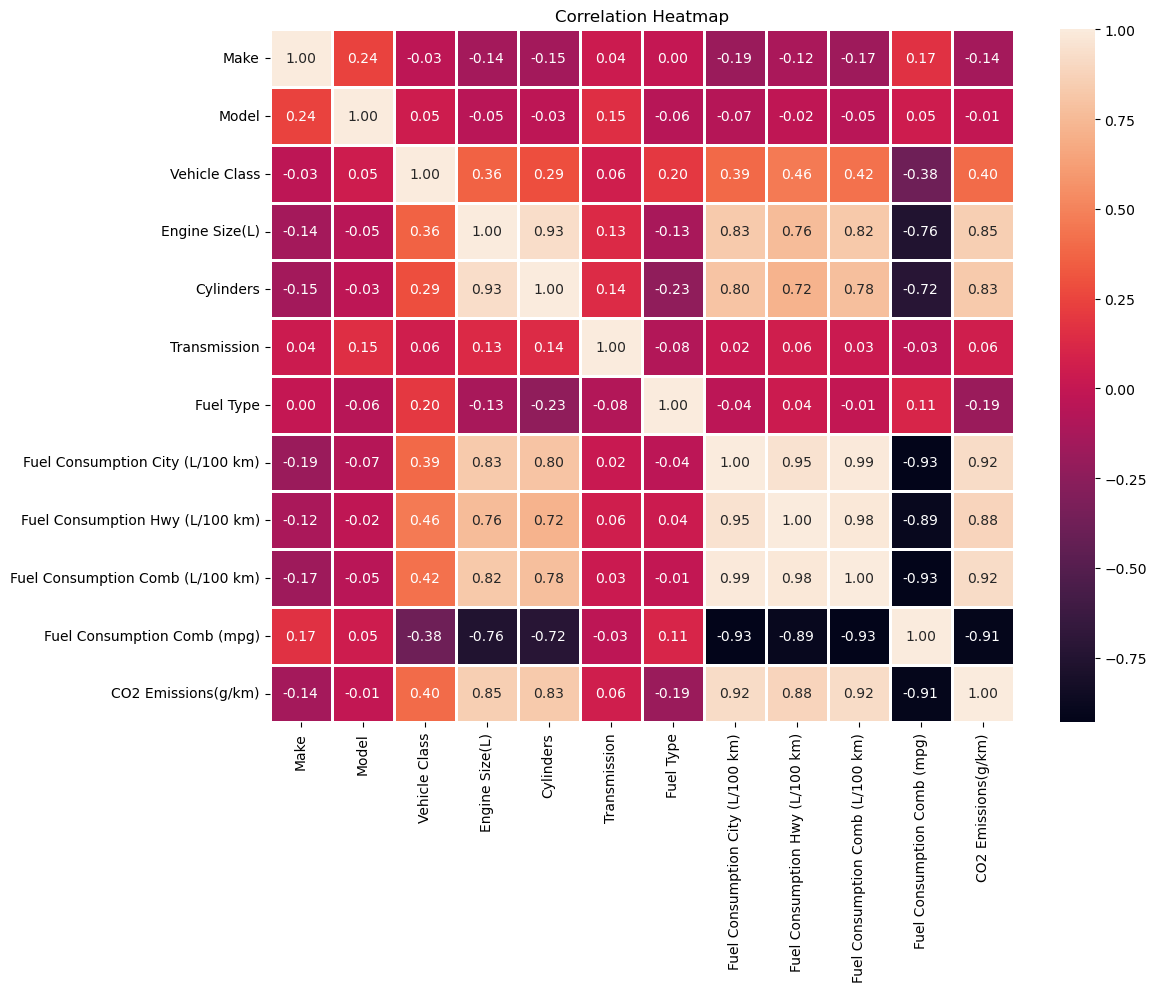

In [29]:
# Create a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(df_corr, annot=True, fmt=".2f", lw=0.8, annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

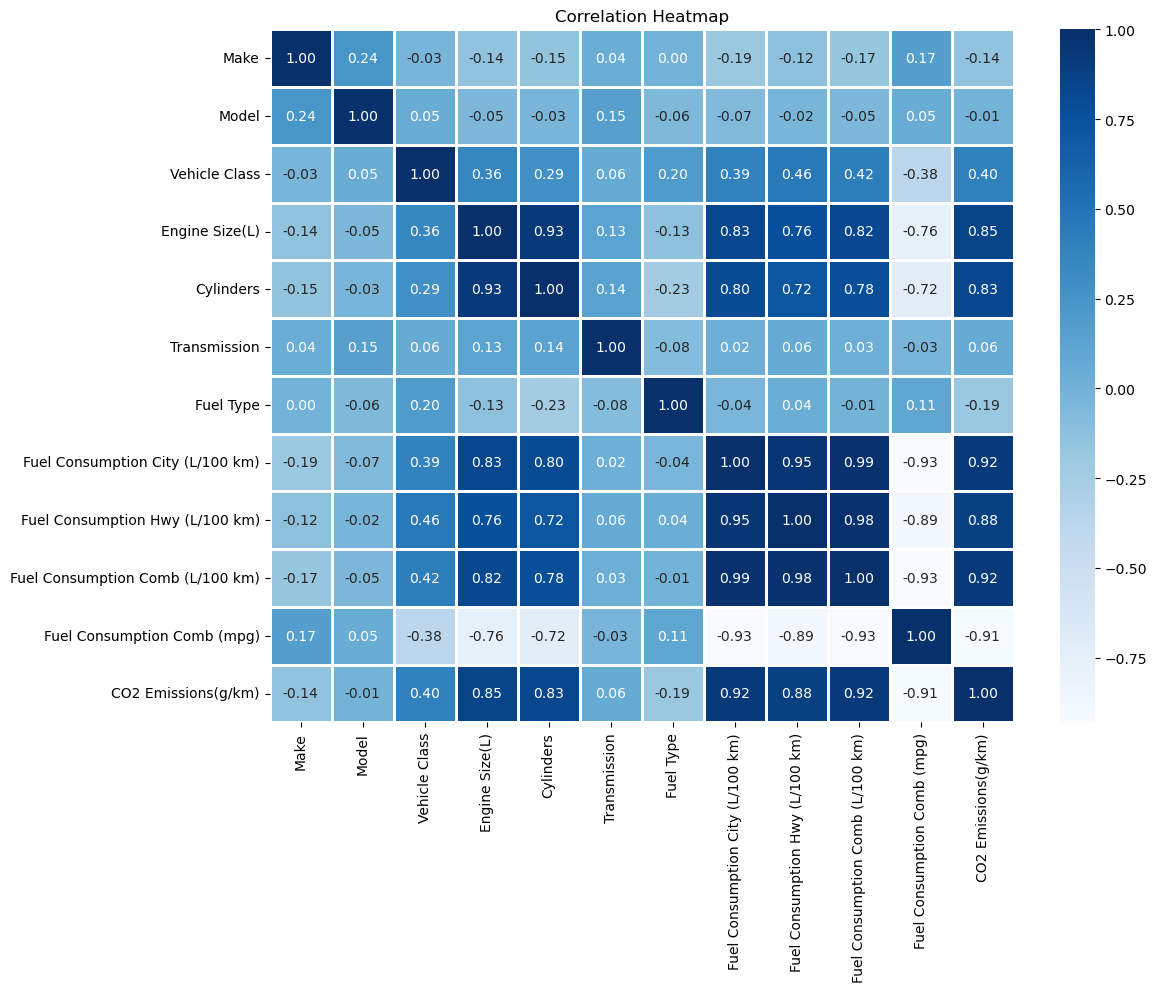

In [30]:
# Create a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(df_corr, annot=True, fmt=".2f", lw=0.8, cmap='Blues', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


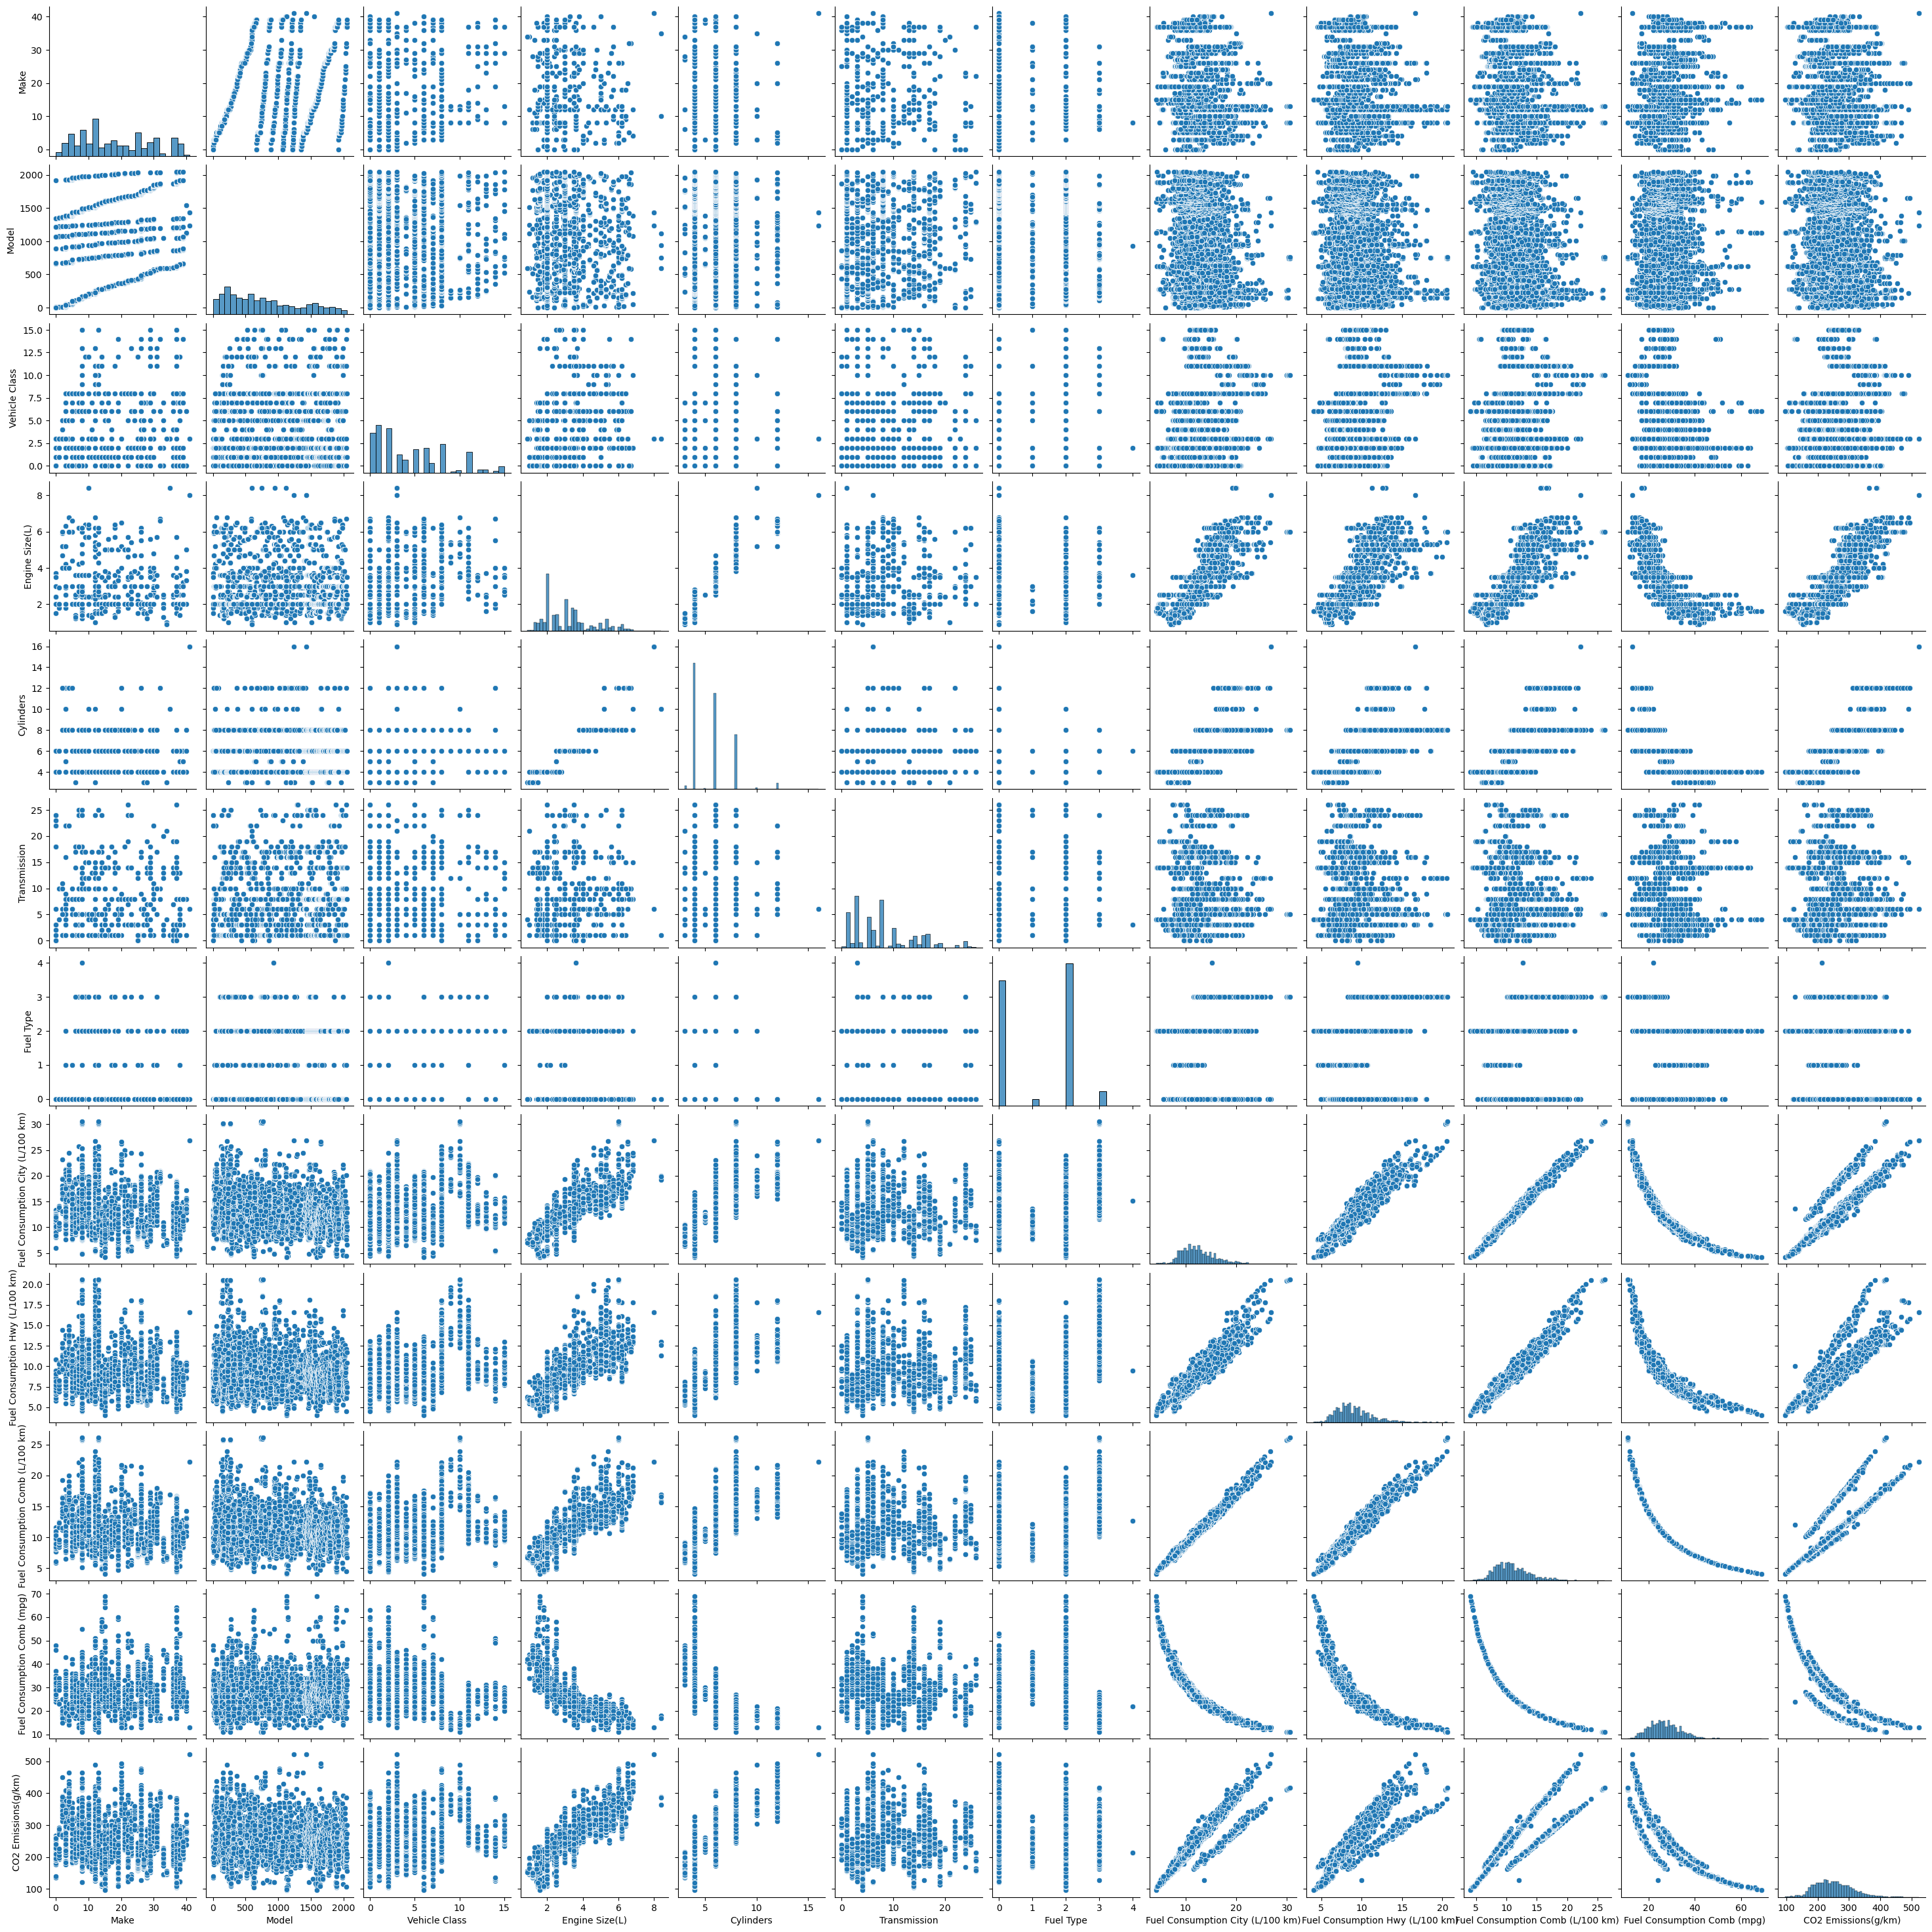

In [31]:
sns.pairplot(df)
plt.show()

In [37]:
# Extract 'Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)' and 'CO2 Emissions(g/km)' columns
Engine_Size = df['Engine Size(L)']
Cylinders = df['Cylinders']
Fuel_Consumption_Comb = df['Fuel Consumption Comb (L/100 km)']
CO2_Emissions = df['CO2 Emissions(g/km)']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient1, p_value1 = scipy.stats.pearsonr(Engine_Size, CO2_Emissions)
correlation_coefficient2, p_value2 = scipy.stats.pearsonr(Cylinders, CO2_Emissions)
correlation_coefficient3, p_value3 = scipy.stats.pearsonr(Fuel_Consumption_Comb, CO2_Emissions)                                                          

# Print the results
print(f'Correlation Coefficient1: {correlation_coefficient1:.4f}')
print(f'Correlation Coefficient2: {correlation_coefficient2:.4f}')
print(f'Correlation Coefficient3: {correlation_coefficient3:.4f}')
print(f'P-value1: {p_value1:.4f}')
print(f'P-value2: {p_value2:.4f}')
print(f'P-value3: {p_value3:.4f}')

# Interpret the results
alpha = 0.05 

# Set your significance level
if p_value1 < alpha:
    print("The correlation between Engine Size and CO2 Emissions is statistically significant.")
else:
    print("The correlation between Engine Size and CO2 Emissions is not statistically significant.")
    
if p_value2 < alpha:
    print("The correlation between Cylinders and CO2 Emissions is statistically significant.")
else:
    print("The correlation between Cylinders and CO2 Emissions is not statistically significant.")
    
if p_value3 < alpha:
    print("The correlation between Fuel Consumption and CO2 Emissions is statistically significant.")
else:
    print("The correlation between Fuel Consumption and CO2 Emissions is not statistically significant.")

Correlation Coefficient1: 0.8511
Correlation Coefficient2: 0.8326
Correlation Coefficient3: 0.9181
P-value1: 0.0000
P-value2: 0.0000
P-value3: 0.0000
The correlation between Engine Size and CO2 Emissions is statistically significant.
The correlation between Cylinders and CO2 Emissions is statistically significant.
The correlation between Fuel Consumption and CO2 Emissions is statistically significant.


In [39]:
# Regression Analysis
# Model Building
to_drop=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
X = df.drop(to_drop, axis=1)
y = df['CO2 Emissions(g/km)']

In [40]:
X.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [41]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

In [42]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (5908, 3)
X_test Shape: (1477, 3)
y_train Shape: (5908,)
y_test Shape: (1477,)


In [43]:
# Linear Regression Model
linear_model = LinearRegression()
fitted_model=linear_model.fit(X_train, y_train)

In [44]:
# Regression Equation
# Access the coefficients and intercept
coefficients = fitted_model.coef_
intercept = fitted_model.intercept_
print("Regression coefficients:", coefficients)
print("Intercept:", intercept)

Regression coefficients: [ 5.59056266  6.47112458 13.15043826]
Intercept: 52.212195356082816


In [46]:
# Model Prediction
y_pred = linear_model.predict(X_test)
pred = []
for elements in y_pred:
    pred.append(elements)
print(pred)

[248.52032020576183, 321.8911101313862, 203.68663186174916, 254.5047454527763, 201.05654420993466, 291.9167664607013, 213.0571323206187, 287.69997065779756, 201.45040679828256, 150.16369758789958, 250.00055770918783, 265.2537649708635, 254.5047454527763, 208.94680716537817, 165.12713680716305, 265.02509606003434, 273.67134657551844, 255.0955393352981, 277.6164780532402, 296.1922852934606, 168.18044856225328, 199.7415003840274, 249.24457014914725, 360.6656401973765, 289.40887707205275, 296.3892165876345, 267.65518371184885, 192.24510001693176, 189.61501236511725, 220.3883390101956, 188.29996853921, 408.45533373043594, 218.31730762424775, 191.12698748519847, 263.71005223412703, 239.35800883876382, 240.6300572503183, 218.152113946729, 237.9999695985038, 326.69394761335695, 252.4337140668284, 208.94680716537817, 218.31730762424775, 306.9682902247481, 218.152113946729, 254.5047454527763, 300.621740006041, 255.26073301281687, 272.91535901547786, 200.33229426654924, 199.68040125244443, 322.55

In [48]:
# Model Evaluation
# Mean squared error
mse = mean_squared_error(y_test, pred)

# r squared
r2 = r2_score(y_test, pred)
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
# Print the results
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print(f'Mean Absolute Error: {mae:.2f}')
# Lower MSE indicates better model performance.
# Higher value of R2 indicating a better fit of the model.

Mean Squared Error: 391.55786771722745
R2 Score: 0.888430972597941
Mean Absolute Error: 13.33
